# Analysis of Bowling Simulation
Brandon Lee, 2020
## Contents
* [The Simulation of a Roll](#the-simulation-of-a-roll)
* [An Example of One Game](#an-example-of-one-game)
* [Analysis of Game Scores](#analysis-of-game-scores)
* [Analysis of the First Roll](#analysis-of-the-first-roll)
* [Analysis of the the Frame](#analysis-of-the-frame)

In [104]:
# imports
import engine
import statistics
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## The Simulation of a Roll
The simulation of a roll can be thought of with the following graph:

![pingraph](pingraph.png)

In the graph above, an arrow A->B indicates that A is "dependent" on B. The default probability that a pin falls in a given roll is defined by the simulation's `SKILL` constant, which has a default value of 0.8. However, this probability is reduced by a factor of 3 for every standing pin that the pin is dependent on.

Whether each pin is standing is evaluated in the order 1, 2, 3, ... as described in the image above so that each pin is evaluated only when the pins it's dependent on have been evaluated. You may notice, however, that this has a flaw: pins 8 and 9 should be dependent on each other for symmetry, but 8 is not dependent on 9 in our graph.

## An Example of One Game

In [105]:
from engine import Game

game = Game()
game.runGame()
print(game.display)

printcard = "Scorecard:\nFrame:\t"
for i in range(10):
    printcard += "%d\t" % (i + 1)
printcard += "\nScore:\t"
for i in range(9):
    printcard += game.scorecard[i] + "\t"
printcard += game.scorecard[9] + " "
if len(game.scorecard) == 11:
    printcard += game.scorecard[10]
printcard += "\n"
printcard = printcard.replace("   ", " ")
printcard = printcard.replace("  ", " ")
print(printcard)

print("Final score:", game.totalscore)


Frame 1
Roll 1:
x o o x
 x o x
  o x
   x
Roll 2:
x o o x
 x o x
  x x
   x

Frame 2
Roll 1:
o o o o
 x o o
  x x
   x
Roll 2:
x x o o
 x o o
  x x
   x

Frame 3
Roll 1:
x o o x
 x o x
  x x
   x
Roll 2:
x x o x
 x x x
  x x
   x

Frame 4
Roll 1:
o o o x
 o o x
  o x
   x
Roll 2:
x x x x
 x x x
  x x
   x

Frame 5
Roll 1:
o o o o
 o o o
  x x
   x
Roll 2:
x o o x
 x o x
  x x
   x

Frame 6
Roll 1:
x o o o
 o o x
  x x
   x
Roll 2:
x x x x
 x x x
  x x
   x

Frame 7
Roll 1:
x o o x
 x o x
  x o
   x
Roll 2:
x x x x
 x x x
  x x
   x

Frame 8
Roll 1:
o o o o
 x o x
  x x
   x
Roll 2:
x x o x
 x x x
  x x
   x

Frame 9
Roll 1:
o o o x
 o o x
  o o
   o
Roll 2:
o o o x
 o o x
  o o
   o

Frame 10
Roll 1:
x x x x
 x x x
  x x
   x
Roll 2:
o o o x
 o o x
  o x
   x
Roll 3:
x o o x
 x x x
  x x
   x


Scorecard:
Frame:	1	2	3	4	5	6	7	8	9	10	
Score:	6 1	4 2	7 2	4 /	3 4	5 /	6 /	5 4	2 0	X 4 4

Final score: 114


## Analysis of Game Scores
### Statistics for Game Scores with SKILL=0.8

SUMMARY STATISTICS
Mean: 129.068
Stdev: 25.65961402265809


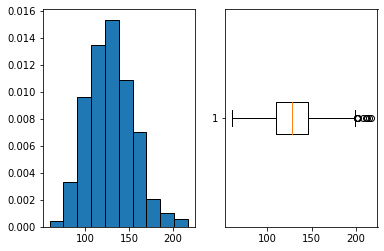

In [106]:
# Get the list of game scores to analyze
GAME_SIMULATIONS = 1000
engine.SKILL = 0.8
scores = []
for i in range(GAME_SIMULATIONS):
    game = engine.Game()
    game.runGame()
    scores.append(game.totalscore)

# Summary statistics
print("SUMMARY STATISTICS")
print("Mean:", statistics.mean(scores))
print("Stdev:", statistics.stdev(scores))

# Plots
fig, axs = plt.subplots(1, 2)
axs[0].hist(scores, density=True, edgecolor='black') # Histogram
axs[1].boxplot(scores, vert=False) # Box plot
plt.show()

### SKILL vs. Game Score

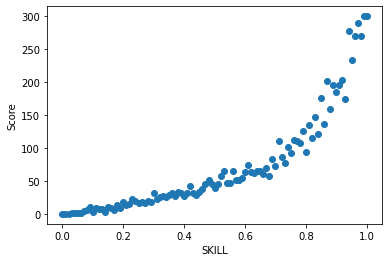

In [107]:
# Get the list of skills vs. score
skills = np.linspace(0,1,100+1,endpoint=True)

scores = []
for skill in skills:
    engine.SKILL = skill
    game = engine.Game()
    game.runGame()
    scores.append(game.totalscore)

plt.scatter(skills,scores)
plt.xlabel("SKILL")
plt.ylabel("Score")
plt.show()

## Analysis of the First Roll
### Number of pins knocked down on first roll

SUMMARY STATISTICS
Mean: 5.516
Stdev: 2.7559643211296003


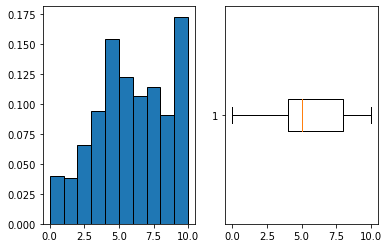

In [108]:
# Get the list of game scores to analyze
ROLL_SIMULATIONS = 1000
engine.SKILL = 0.8
pins = []
knocked = [0,0,0,0,0,0,0,0,0,0,]
results = [[],[],[],[],[],[],[],[],[],[],]
for i in range(ROLL_SIMULATIONS):
    pinSet = engine.PinSet()
    result = pinSet.roll()
    for j in range(len(result)):
        results[j].append(result[j])
        knocked[j] += result[j]
    pins.append(sum(result))

# Summary statistics
print("SUMMARY STATISTICS")
print("Mean:", statistics.mean(pins))
print("Stdev:", statistics.stdev(pins))

# Plots
fig, axs = plt.subplots(1, 2)
axs[0].hist(pins, density=True, edgecolor='black') # Histogram
axs[1].boxplot(pins, vert=False) # Box plot
plt.show()

### Which pins get knocked down?
![pingraph](pingraph.png)

Text(0.5, 0, 'Pin number')

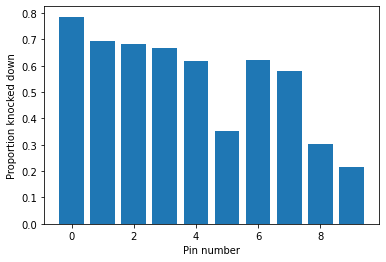

In [109]:
plt.bar(range(10), [i/ROLL_SIMULATIONS for i in knocked])
plt.ylabel("Proportion knocked down")
plt.xlabel("Pin number")

### Correlation of pins being knocked down

In [110]:
corr = [[0 for x in range(10)] for y in range(10)]
for pin1 in range(10):
    for pin2 in range(10):
        corr[pin1][pin2], p = scipy.stats.pearsonr(results[pin1], results[pin2])

print("   ", end="\t")
for i in range(10):
    print("| %d" % (i), end="\t")
print()
print("----------------------------------------------------------------------------------------")
for i in range(10):
    print("  %d" % (i), end="\t")
    for j in range(10):
        print("| %.2f" % (corr[i][j]), end="\t")
    print()

   	| 0	| 1	| 2	| 3	| 4	| 5	| 6	| 7	| 8	| 9	
----------------------------------------------------------------------------------------
  0	| 1.00	| 0.52	| 0.49	| 0.27	| 0.24	| 0.27	| 0.16	| 0.14	| 0.14	| 0.18	
  1	| 0.52	| 1.00	| 0.25	| 0.53	| 0.12	| 0.38	| 0.29	| 0.04	| 0.26	| 0.19	
  2	| 0.49	| 0.25	| 1.00	| 0.11	| 0.52	| 0.40	| 0.06	| 0.33	| 0.16	| 0.24	
  3	| 0.27	| 0.53	| 0.11	| 1.00	| 0.09	| 0.40	| 0.53	| 0.07	| 0.39	| 0.24	
  4	| 0.24	| 0.12	| 0.52	| 0.09	| 1.00	| 0.45	| 0.07	| 0.55	| 0.26	| 0.37	
  5	| 0.27	| 0.38	| 0.40	| 0.40	| 0.45	| 1.00	| 0.20	| 0.24	| 0.51	| 0.48	
  6	| 0.16	| 0.29	| 0.06	| 0.53	| 0.07	| 0.20	| 1.00	| 0.07	| 0.40	| 0.19	
  7	| 0.14	| 0.04	| 0.33	| 0.07	| 0.55	| 0.24	| 0.07	| 1.00	| 0.17	| 0.36	
  8	| 0.14	| 0.26	| 0.16	| 0.39	| 0.26	| 0.51	| 0.40	| 0.17	| 1.00	| 0.49	
  9	| 0.18	| 0.19	| 0.24	| 0.24	| 0.37	| 0.48	| 0.19	| 0.36	| 0.49	| 1.00	


## Analysis of the Frame
### Number of pins knocked down after second roll (end of frame)

SUMMARY STATISTICS
Mean: 8.419
Stdev: 1.9542922653119872


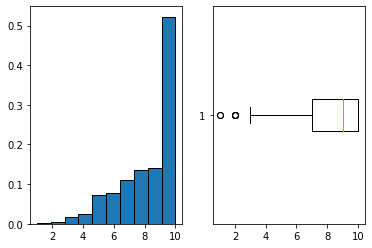

In [111]:
# Get the list of game scores to analyze
ROLL_SIMULATIONS = 1000
engine.SKILL = 0.8
pins = []
for i in range(ROLL_SIMULATIONS):
    pinSet = engine.PinSet()
    pinSet.roll()
    result = pinSet.roll()
    pins.append(sum(result))

# Summary statistics
print("SUMMARY STATISTICS")
print("Mean:", statistics.mean(pins))
print("Stdev:", statistics.stdev(pins))

# Plots
fig, axs = plt.subplots(1, 2)
axs[0].hist(pins, density=True, edgecolor='black') # Histogram
axs[1].boxplot(pins, vert=False) # Box plot
plt.show()